In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wrangle import wrangle, wrangle_explore
from sklearn.model_selection import train_test_split

# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene

# Viewing Options
pd.set_option("display.max_rows", None, "display.max_columns", None) 

pd.reset_option("display.max_rows", "display.max_columns")
import warnings
warnings.filterwarnings("ignore")

# Random exploration of data

In [2]:
train, validate, test = wrangle_explore()

In [3]:
train.head(1)

,country,region,number_of_bags,harvest_year,grading_date,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,altitude_mean_meters,bag_weight,grading_month,grading_year,grading_day,excellent_rating
806,Taiwan,"dongshan dist., tainan city 臺南市東山區",30,2012,2013-06-03,Typica,Washed / Wet,7.42,7.58,7.33,7.42,8.0,7.5,9.33,10.0,10.0,7.42,82.0,0.12,0,0.0,Blue-Green,0,650.0,10.0,6,2013,3,0


In [4]:
train.processing_method.value_counts()

Washed / Wet                 368
Natural / Dry                 81
Semi-washed / Semi-pulped     20
Name: processing_method, dtype: int64

In [5]:
# df_plus will be the dataframe that holds all the values of where our target excellent rating is true
df_rating = train[train.excellent_rating == 1]

In [6]:
# 
s = ((df_rating.processing_method.value_counts()/train.processing_method.value_counts())*100).sort_values(ascending = False)
index_ = list(s.index)
index_[0] = 'Washed/Wet'
index_[1] =  'Natural/Dry'
index_[2] = 'Semi Washed/Pulped'
s.index = index_

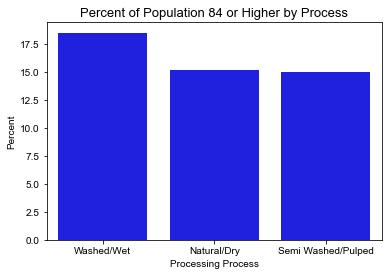

In [7]:
ax = sns.barplot(s.index, s, color='blue')

ax.set_title('Percent of Population 84 or Higher by Process', fontsize = 13)
sns.set(font_scale = 1.1)
ax.set(xlabel='Processing Process', ylabel='Percent')
plt.show()

In [8]:
s = ((df_rating.variety.value_counts()/train.variety.value_counts())*100).sort_values(ascending = False)
index_ = list(s.index)
index_

['Other',
 'Caturra',
 'Catuai',
 'Yellow Bourbon',
 'Bourbon',
 'Typica',
 'Mundo Novo']

In [9]:
index_[3] = 'Mundo N.'
index_[6] = 'Yellow B.'
s.index = index_

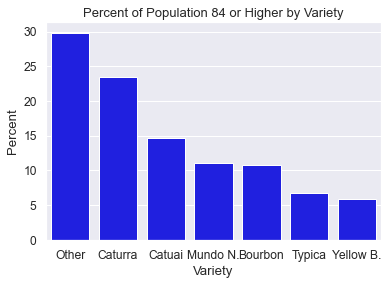

In [10]:
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('Percent of Population 84 or Higher by Variety', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Variety', ylabel='Percent')
plt.show()

In [11]:
train.head(1)

,country,region,number_of_bags,harvest_year,grading_date,variety,processing_method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean_cup,sweetness,cupper_points,total_cup_points,moisture,category_one_defects,quakers,color,category_two_defects,altitude_mean_meters,bag_weight,grading_month,grading_year,grading_day,excellent_rating
806,Taiwan,"dongshan dist., tainan city 臺南市東山區",30,2012,2013-06-03,Typica,Washed / Wet,7.42,7.58,7.33,7.42,8.0,7.5,9.33,10.0,10.0,7.42,82.0,0.12,0,0.0,Blue-Green,0,650.0,10.0,6,2013,3,0


# Checking for any variance by Harvest Year

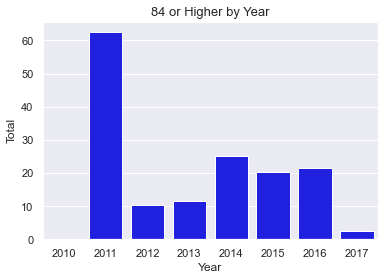

In [12]:
s = ((df_rating.harvest_year.value_counts(ascending=True)/train.harvest_year.value_counts(ascending=True))*100).sort_values()

ax = sns.barplot(s.index, s, color='blue')
ax.set_title('84 or Higher by Year', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Year', ylabel='Total')
plt.show()

# Check for variance by grading month

In [13]:
df_rating.grading_month.value_counts()

12    12
3     11
4     10
5      8
6      6
7      5
8      5
10     5
2      4
1      3
9      3
11     2
Name: grading_month, dtype: int64

In [14]:
train.grading_month.value_counts()

9     54
7     52
8     52
5     45
4     44
6     44
3     41
12    35
10    32
2     29
1     21
11    20
Name: grading_month, dtype: int64

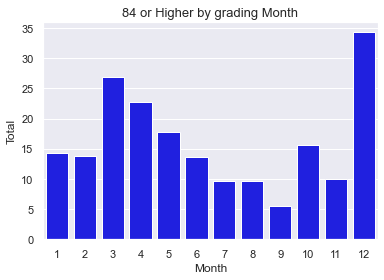

In [15]:
s = (df_rating.grading_month.value_counts()/train.grading_month.value_counts()*100).sort_values()
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('84 or Higher by grading Month', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Month', ylabel='Total')
plt.show()

In [16]:
df_rating.grading_year.value_counts()

2012    16
2015    16
2014    15
2013     9
2016     9
2011     5
2017     4
Name: grading_year, dtype: int64

In [17]:
train.grading_year.value_counts()

2012    158
2014     83
2015     72
2013     61
2017     54
2016     32
2011      8
2010      1
Name: grading_year, dtype: int64

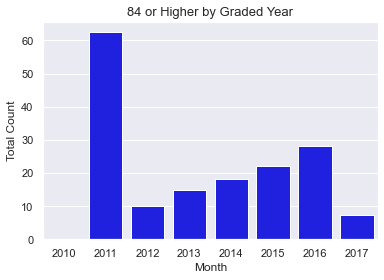

In [44]:
s = (df_rating.grading_year.value_counts()/train.grading_year.value_counts()*100).sort_values()
ax = sns.barplot(s.index, s, color='blue')
ax.set_title('84 or Higher by Graded Year', fontsize = 13)
sns.set(font_scale = 1)
ax.set(xlabel='Month', ylabel='Total Count')
plt.show()

<AxesSubplot:>

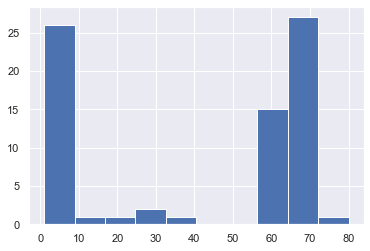

In [19]:
df_rating.bag_weight.hist()

In [20]:
df_rating.bag_weight.mean()

40.986486486486484

In [21]:
train.bag_weight.mean()

33.850746268656714

In [25]:
df_rating.bag_weight.median()

60.0

In [23]:
train.bag_weight.median()

29.0

In [27]:
len(df_rating)

74

In [26]:
len(train)

469

# Question 2

    Is the average bag_weight for a coffee rated 84 or higher different than the weight of all coffee?

### Setting up seperate dataframes

In [28]:
# df_rating is equal to a coffee rating 84 or higher
df_rating = train[train['excellent_rating'] == 1]

In [29]:
# checking number of values in each
len(df_rating), len(train)

(74, 469)

### Checking Mean

In [32]:
# bag_weight mean for coffee rated 84 or higher 
df_rating.bag_weight.mean()

40.986486486486484

In [33]:
# Entire population bag_weight mean
train.bag_weight.mean()

33.850746268656714

### Graph

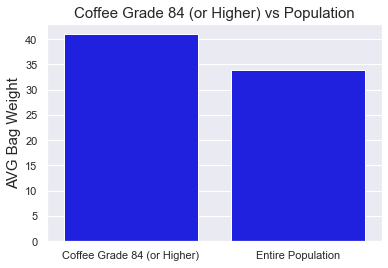

In [51]:
rating = ['Coffee Grade 84 (or Higher)', 'Entire Population']
rating_mean = [df_rating.bag_weight.mean(), train.bag_weight.mean()]
ax = sns.barplot(rating, rating_mean, color='blue')

ax.set_xlabel('',fontsize = 15, )
ax.set_ylabel('Bag Weight',fontsize = 15)
ax.set_title('Coffee Grade 84 (or Higher) vs Population', fontsize = 15)
sns.set(font_scale = 1)
ax.set(xlabel='', ylabel='AVG Bag Weight')
plt.show()

### Question 2 At A Glance

    - 84 or higher rated coffee did have a higher bag_weight mean than the entire population of coffee.  
    - The mean were not too far off from one another

### Hypothesis Test
    Running a hypothesis test to make sure the results didn't happen by accident

### Significance Level

In [56]:
# A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
alpha = .05

### Checking Assumptions

    - Independent
    - Normally Distributed
    - Equal Variances

### Independent?
    No, entire population includes 84 or higher graded coffee

### Normally Distributed?
    - 84 or higher rated bag weight is not normally distributed
    - Entire population is not normally distributed

<AxesSubplot:>

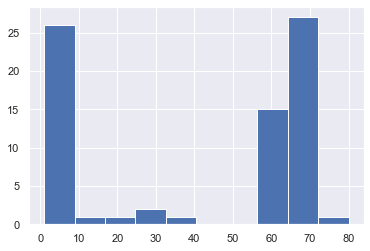

In [52]:
sns.set(font_scale = 1)
df_rating.bag_weight.hist()

<AxesSubplot:>

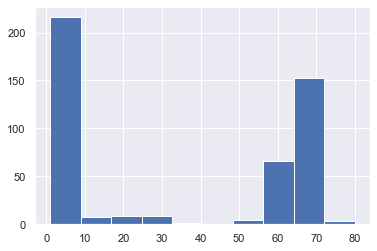

In [53]:
train.bag_weight.hist()

### Equal Variances?
    - The leven test concluded the populations did not have equal variances.

In [54]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(df_rating.bag_weight, train.bag_weight)
stats, p

(10.16763616986114, 0.0015119628803599763)

In [57]:
# The small p-value suggests that the populations do not have equal variances.
if p < alpha:
    print("populations do not have equal variances")
else:
    print("populations do have equal variances")

populations do not have equal variances


###  Wilcoxon
    Assumptions were not met.  I will use a Non-Parametric Test.

### Hypothesis

### $H_0$: The average bag_weight of 84 or higher rated coffee is not different than the average of the entire population.
### $H_a$: The average bag_weight of 84 or higher rated coffee is different than the average of the entire population.

### Hypothesised Median

In [59]:
hypo_med = df_rating.bag_weight.mean()
hypo_med

40.986486486486484

In [64]:
z, p = wilcoxon(train.bag_weight - hypo_med)
z, p

(29614.0, 2.3195492778683327e-18)

In [66]:
if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Reject Null Hypothesis


### Hypotheis Results
    - The average bag_weight of 84 or higher rated coffee is different than the average of the entire population.

### Question 2 Takeway
    - I have a 95% confidence level that there is a difference in bag_weight between 84 or higher rated and the entire population of coffee.
    - However thee means were not too far off from one another